In [35]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [36]:
#Training DataSet
# x: Area Size(Hectares)
# Y:price(lakhs)
xTrain=np.array([3,5,7,9,10,15,25])
yTrain=np.array([7.5,12.5,15,19,22,33,48])
#x_test=np.array([])
print("x Train :",xTrain)
print("y Train :",yTrain)

x Train : [ 3  5  7  9 10 15 25]
y Train : [ 7.5 12.5 15.  19.  22.  33.  48. ]


In [37]:
import random

# Generate and store the random values in an array
w = [random.randint(-25, 25) for i in range(1000)]
b = [random.randint(-25, 25) for i in range(1000)]

print(w,"/n",b)

[0, 2, 3, -23, -18, 16, -15, 21, 16, 24, -14, -8, 18, -22, -18, 4, -13, -9, 2, 19, 2, -11, 5, -5, -19, 7, -20, -24, -8, 22, -15, -17, -23, -10, 3, 5, -23, 11, -25, 17, 6, -22, -11, 1, 6, -15, -1, 17, -14, -7, -17, 24, 5, 5, -20, -20, 20, 16, -6, 15, -19, -8, 3, -8, 16, -3, -5, 1, 0, 21, -6, 6, -5, 20, -21, -10, -3, -11, -12, 13, -3, -17, 17, -4, 19, -17, 7, 19, 4, 5, 1, 14, -11, 17, -18, -7, -20, 14, 4, 3, 22, 15, -25, 7, 22, -16, 15, -8, -5, -6, 22, 25, -3, -1, -22, 24, 1, -17, -7, 8, -25, -12, 5, 19, -4, -18, -12, 1, -10, -13, 24, 18, 7, -18, -17, -3, 16, -21, 23, 19, -5, -23, -21, -18, 14, -21, 13, -6, 17, 11, -16, 12, 9, 23, -2, 2, 15, -7, 5, 15, 17, -7, -2, -24, 12, 11, -17, -22, -3, 19, 5, 22, -19, 12, 7, 15, 1, -10, 4, 17, -23, 8, 9, 25, 11, -9, 24, 15, 16, 4, -1, -6, -1, 14, 18, -11, 4, -5, -22, -3, 25, 14, 20, 14, -15, 22, 23, 1, 14, 5, 2, 15, -11, 5, -21, 23, -14, -15, 16, -14, 17, -24, -8, -20, 5, 5, -19, -7, -3, 14, 3, -13, -16, 24, 19, -6, 2, -8, -9, 20, 9, -2, 13, 24, -2,

Text(0.5, 0, 'Area Size')

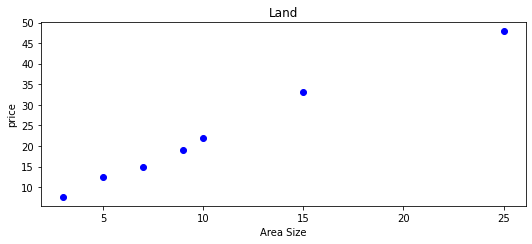

In [38]:
# Plot the data points
plt.scatter(xTrain, yTrain,c='b')
plt.title("Land")
plt.ylabel('price')
plt.xlabel('Area Size')

In [41]:
from types import LambdaType
from locale import LC_ALL
# defined Y^ (predcition value) for given w,b
def model(x, w, b):
    L = x.shape[0]
    y_wb = np.zeros(L)
    for i in range(L):
        y_wb[i] = w * x[i] + b
        
    return y_wb

# define cost function

def cost_function(x, y, w, b): 
    L = x.shape[0] 
    
    cost_sum = 0 
    for i in range(L): 
        y_wb = w * x[i] + b   
        cost = (y_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * L)) * cost_sum  

    return total_cost

In [42]:
# let b=0  so, cost function y(w,b) only depends on w
# value of W for each x
temp_w=[]
for i in w:
  temp_w.append(model(xTrain, i, 0))

#print(temp_w)

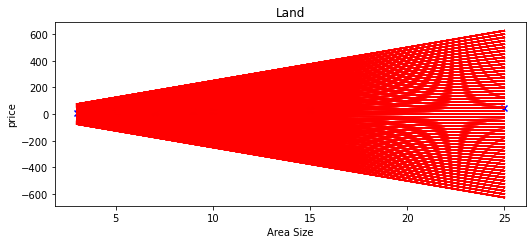

In [43]:
# Plot the data points
plt.scatter(xTrain, yTrain, marker='x', c='b',label='Actual Values')
#plt.scatter(xTrain, yTrain,c='b')

plt.title("Land")
plt.ylabel('price')
plt.xlabel('Area Size')

# plot the prediction
for i in range(len(temp_w)):
  plt.plot(xTrain, temp_w[i], c='r',label='Prediction')                     
                  
plt.show()  

Text(0.5, 0, 'w')

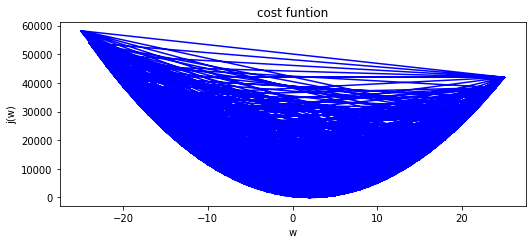

In [45]:
# cost funtion for each w
temp_jwb=[]
for i in w:
  temp_jwb.append(cost_function(xTrain, yTrain, i, 0))

# Plot j(w) vs w
plt.plot(w,temp_jwb,c='b')
plt.title("cost funtion")
plt.ylabel('j(w)')
plt.xlabel('w')

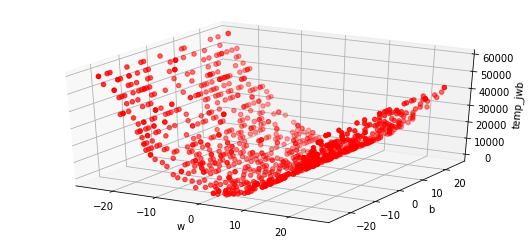

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(w, b, temp_jwb , c='r', marker='o')

# 3 axis
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('temp_jwb')

plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


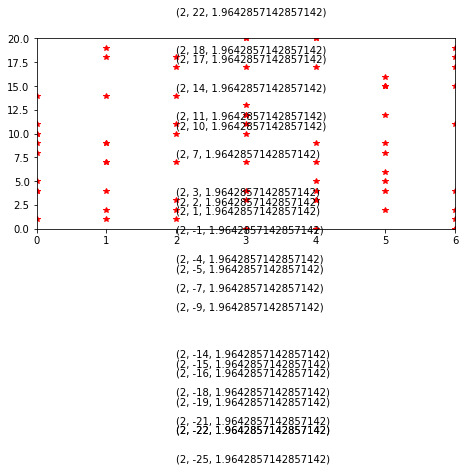

In [47]:

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(w, b, 'r*')
plt.axis([0, 6, 0, 20])

for i, j,k in zip(w, b,temp_jwb):
  if k==min(temp_jwb):
    plt.text(i, j+0.5, '({}, {}, {})'.format(i, j,k))

plt.show()

In [48]:
b_ywb=[]
for i,j,k in zip(w, b,temp_jwb):
  if k==min(temp_jwb):
    b_ywb.append(j)
print(b_ywb)

[-14, 22, -25, 3, 17, -5, -4, 10, -7, -19, 11, -22, -9, 1, 2, -16, -22, -1, 18, -15, 7, -18, 14, -21]


In [49]:
#test accuracy for each b values
final_w=2
cost=[]
for b in b_ywb:
    cost.append(cost_function(xTrain, yTrain, final_w, b))
print('cost:',cost)

#min cost => good accuracy

final_b=b_ywb[cost.index(min(cost))]

print(" b :",final_b)



cost: [117.96428571428571, 215.67857142857142, 346.60714285714283, 2.607142857142857, 124.60714285714285, 20.892857142857142, 15.107142857142856, 39.107142857142854, 35.464285714285715, 206.89285714285714, 48.32142857142857, 272.25, 54.035714285714285, 1.1785714285714286, 1.3928571428571428, 150.53571428571428, 272.25, 3.75, 140.82142857142856, 133.75, 17.46428571428571, 187.10714285714283, 81.96428571428571, 249.4642857142857]
 b : 1


In [50]:
def finalmodel(x):
    y=final_w*x+final_b
    #print("Y :",y)
    return y

In [51]:
# if x=80 then y=170
y=finalmodel(80)
print('Y:',y)

Y: 161
